In [4]:
import tensorflow as tf
from tensorflow.keras import layers, datasets, models # type: ignore
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline

In [5]:
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [19]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [15]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [27]:
def plotImg(x,y,i):
    plt.figure(figsize=(10,2))
    plt.imshow(x[i])
    plt.xlabel(classes[y[i]])

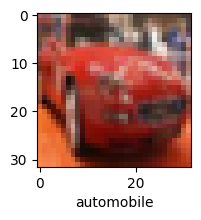

In [28]:
plotImg(X_train,y_train,5)

In [30]:
X_train = X_train / 255
X_test = X_test / 255

In [36]:
model = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(2000,activation="relu"),  
    layers.Dense(1000,activation="relu"),  
    layers.Dense(10,activation="sigmoid"),  
])
model.compile(
    optimizer="SGD",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)
model.fit(X_test,y_test, epochs=5)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.2302 - loss: 2.1076
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.3449 - loss: 1.8458
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.3874 - loss: 1.7483
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.4145 - loss: 1.6790
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.4298 - loss: 1.6244


In [38]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4425 - loss: 1.5986


[1.6008402109146118, 0.439300000667572]

In [49]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(62,activation="relu"),  
    layers.Dense(10,activation="softmax"), 
])
cnn.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [50]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.3784 - loss: 1.7110
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6007 - loss: 1.1403
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6483 - loss: 1.0032
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.6927 - loss: 0.8873
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.7131 - loss: 0.8268
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7392 - loss: 0.7562
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.7603 - loss: 0.6987
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7743 - loss: 0.6519
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.7897 - loss: 0.6066
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - accuracy: 0.8006 - loss: 0.5712


In [51]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7082 - loss: 0.8980


[0.9144654273986816, 0.7014999985694885]

In [60]:
y = cnn.predict(X_test)
y[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


array([[5.17200388e-04, 3.25039937e-03, 8.09677294e-04, 8.30435455e-01,
        2.14672508e-03, 1.19718559e-01, 3.99645977e-02, 1.17207237e-04,
        2.58124387e-03, 4.58949682e-04],
       [2.11699051e-03, 7.62490109e-02, 6.31551529e-07, 6.44728004e-07,
        1.01158626e-07, 1.87408332e-07, 6.40306874e-09, 9.23323498e-08,
        9.21184301e-01, 4.48012666e-04],
       [2.86175698e-01, 2.87294127e-02, 6.09171158e-03, 4.40400699e-03,
        4.95652389e-03, 2.54514208e-03, 3.16807680e-04, 1.18208714e-02,
        6.31886005e-01, 2.30739154e-02],
       [9.58900154e-01, 8.39833927e-04, 2.63091992e-04, 2.18937465e-04,
        1.39188617e-02, 9.92787318e-06, 6.09031667e-05, 1.05187646e-05,
        2.23255008e-02, 3.45240580e-03],
       [7.86513010e-06, 2.36112028e-05, 5.03976643e-03, 3.15939263e-02,
        1.61509782e-01, 4.80374147e-04, 8.01148415e-01, 2.91198994e-05,
        1.64890531e-04, 2.29508237e-06]], dtype=float32)

In [63]:
y_test = y_test.reshape(-1,)

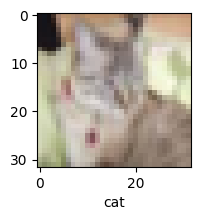

In [68]:
plotImg(X_test,y_test, 8)